# Data Analyzer

In [1]:
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import pandas as pd

In [1]:
'Algorithm: bini322'.split('Algorithm: ')

['', 'bini322']

Algorithm: bini322

Total time: 196.92669939994812

Matrix size: 512

Algorithm: dgemm

Total time: 48.31298470497131

Matrix size: 512

Algorithm: schonhage333

Total time: 239.6862132549286

Matrix size: 512

Algorithm: smirnov224

Total time: 203.17712593078613

Matrix size: 512

Algorithm: smirnov225

Total time: 209.89183521270752

Matrix size: 512

Algorithm: smirnov272

Total time: 228.12068629264832

Matrix size: 512

Algorithm: smirnov323

Total time: 213.3170256614685

Matrix size: 512

Algorithm: smirnov333

Total time: 242.10198140144348

Matrix size: 512

Algorithm: smirnov334

Total time: 180.87720155715942

Matrix size: 512

Algorithm: smirnov442

Total time: 140.53295135498047

Matrix size: 512

Algorithm: smirnov444

Total time: 222.70120239257812

Matrix size: 512

Algorithm: smirnov552

Total time: 229.54405999183655

Matrix size: 512

Algorithm: smirnov555

Total time: 250.06169056892395

Matrix size: 512

Algorithm: bini322

Total time: 196.4872064590454

Matrix si

## Hybrid Compiled, All Threads, FastMM Gradient, Bini, Dgemm, Regular

In [3]:
log_folder = 'output_all_threads_fastmm_gradient_regular_bini_dgemm/'

In [31]:
# get the prefixes for each run
total_types = set()
for i in os.listdir(log_folder):
    name = i.split('_')[:-1]
    fullname = ''
    for j in name:
        fullname += j + '_'
    total_types.add(fullname)

In [33]:
total_types

{'layer_4_nodes_1024_bs_1024_mm_',
 'layer_4_nodes_1024_bs_256_mm_',
 'layer_4_nodes_1024_bs_4096_mm_',
 'layer_4_nodes_1024_bs_8192_mm_',
 'layer_4_nodes_256_bs_1024_mm_',
 'layer_4_nodes_256_bs_256_mm_',
 'layer_4_nodes_256_bs_4096_mm_',
 'layer_4_nodes_256_bs_8192_mm_',
 'layer_4_nodes_4096_bs_1024_mm_',
 'layer_4_nodes_4096_bs_256_mm_',
 'layer_4_nodes_4096_bs_4096_mm_',
 'layer_4_nodes_4096_bs_8192_mm_',
 'layer_4_nodes_8192_bs_1024_mm_',
 'layer_4_nodes_8192_bs_256_mm_',
 'layer_4_nodes_8192_bs_4096_mm_',
 'layer_4_nodes_8192_bs_8192_mm_',
 'layer_8_nodes_1024_bs_1024_mm_',
 'layer_8_nodes_1024_bs_256_mm_',
 'layer_8_nodes_1024_bs_4096_mm_',
 'layer_8_nodes_1024_bs_8192_mm_',
 'layer_8_nodes_256_bs_1024_mm_',
 'layer_8_nodes_256_bs_256_mm_',
 'layer_8_nodes_256_bs_4096_mm_',
 'layer_8_nodes_256_bs_8192_mm_',
 'layer_8_nodes_4096_bs_1024_mm_',
 'layer_8_nodes_4096_bs_256_mm_'}

In [53]:
def batch_time_plotter(types):
    algos = ['bini322', 'dgemm', 'regular'] # finding this could also be dynamic
    bini = []
    dgemm = []
    regular = []
    for t in types:
        #print(f'\n\n{t}')
        for a in algos:
            try:
                f = open(f'{log_folder}{t}{a}.log', "r")
                text = f.read()
                f.close()
                avg_time_per_batch = text.split('\n')[-3].split(' ')[-1]

                if a == 'bini322':
                    bini.append(round(float(avg_time_per_batch), 2))
                if a == 'regular':
                    regular.append(round(float(avg_time_per_batch), 2))
                if a == 'dgemm':
                    dgemm.append(round(float(avg_time_per_batch), 2))

                #print(f'{a} Average Time per batch: {avg_time_per_batch}')
            except:
                print(f'{a} Did not finish')

                if a == 'bini322':
                    bini.append(0)
                if a == 'regular':
                    regular.append(0)
                if a == 'dgemm':
                    dgemm.append(0)

    x = np.arange(len(types))
    width = 0.2

    plt.rcParams['figure.figsize'] = [15, 6]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/3, regular, width, label='Regular')
    rects2 = ax.bar(x + width/3, bini, width, label='Bini')
    rects3 = ax.bar(x + 2 * width/3, dgemm, width, label='Dgemm')

    ax.set_ylabel('Average Time per batch')
    ax.set_title('Algorithm Time per batch')
    ax.set_xticks(x)
    ax.set_xticklabels(types)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()


    plt.show()

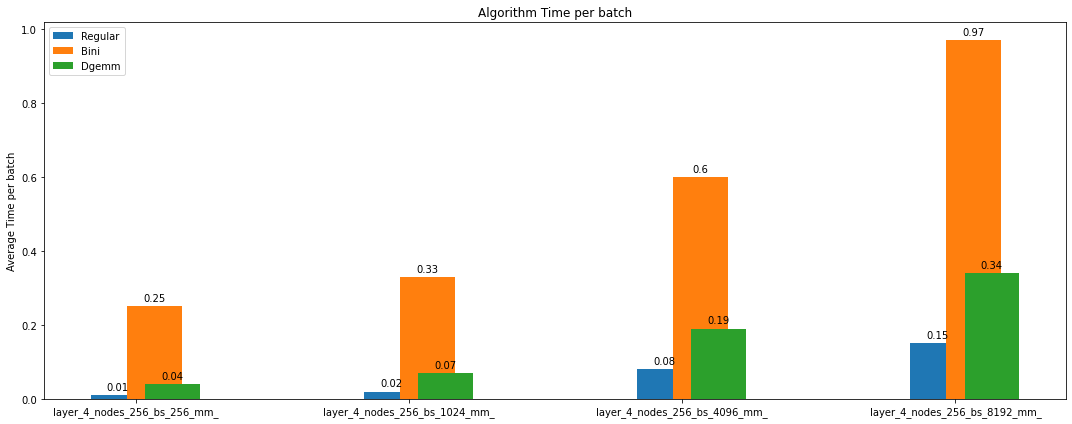

In [54]:
types = ['layer_4_nodes_256_bs_256_mm_','layer_4_nodes_256_bs_1024_mm_','layer_4_nodes_256_bs_4096_mm_','layer_4_nodes_256_bs_8192_mm_',]
batch_time_plotter(types=types)

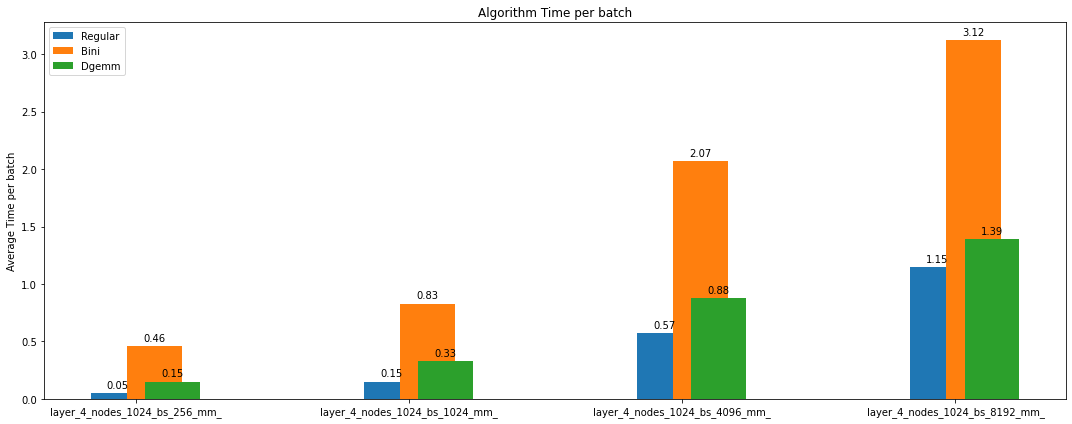

In [55]:
types = ['layer_4_nodes_1024_bs_256_mm_','layer_4_nodes_1024_bs_1024_mm_','layer_4_nodes_1024_bs_4096_mm_','layer_4_nodes_1024_bs_8192_mm_']
batch_time_plotter(types=types)

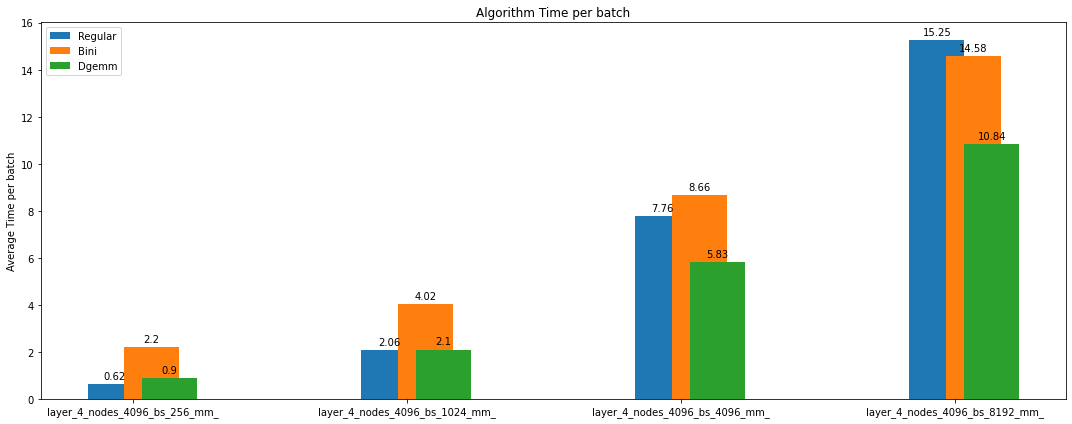

In [56]:
types = ['layer_4_nodes_4096_bs_256_mm_','layer_4_nodes_4096_bs_1024_mm_',
 'layer_4_nodes_4096_bs_4096_mm_',
 'layer_4_nodes_4096_bs_8192_mm_',]
batch_time_plotter(types=types)

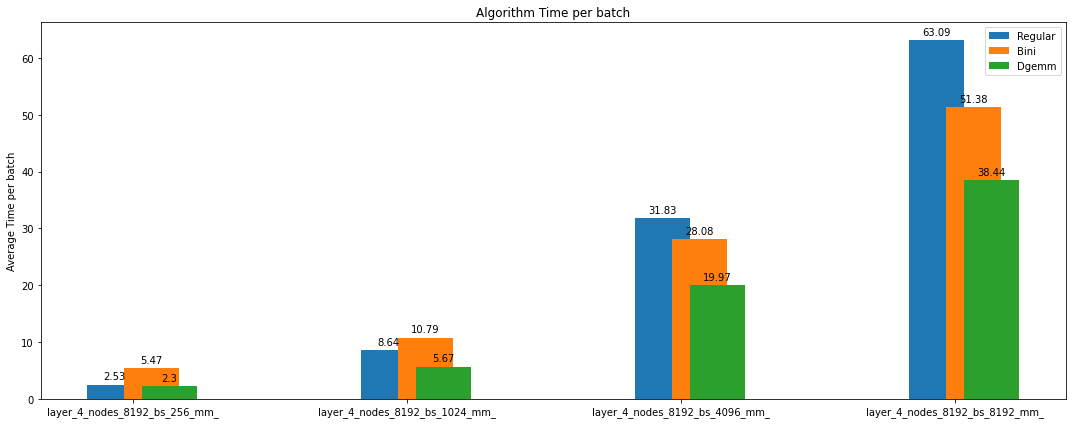

In [57]:
types = ['layer_4_nodes_8192_bs_256_mm_','layer_4_nodes_8192_bs_1024_mm_', 'layer_4_nodes_8192_bs_4096_mm_', 'layer_4_nodes_8192_bs_8192_mm_',]
batch_time_plotter(types=types)

In [58]:
def epoch_time_plotter(types):
    algos = ['bini322', 'dgemm', 'regular'] # finding this could also be dynamic
    bini = []
    dgemm = []
    regular = []
    for t in types:
        #print(f'\n\n{t}')
        for a in algos:
            try:
                f = open(f'{log_folder}{t}{a}.log', "r")
                text = f.read()
                f.close()
                avg_time_per_batch = text.split('\n')[-2].split(' ')[-1]

                if a == 'bini322':
                    bini.append(round(float(avg_time_per_batch), 2))
                if a == 'regular':
                    regular.append(round(float(avg_time_per_batch), 2))
                if a == 'dgemm':
                    dgemm.append(round(float(avg_time_per_batch), 2))

                #print(f'{a} Average Time per batch: {avg_time_per_batch}')
            except:
                print(f'{a} Did not finish')

                if a == 'bini322':
                    bini.append(0)
                if a == 'regular':
                    regular.append(0)
                if a == 'dgemm':
                    dgemm.append(0)

    x = np.arange(len(types))
    width = 0.2

    plt.rcParams['figure.figsize'] = [15, 6]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/3, regular, width, label='Regular')
    rects2 = ax.bar(x + width/3, bini, width, label='Bini')
    rects3 = ax.bar(x + 2 * width/3, dgemm, width, label='Dgemm')

    ax.set_ylabel('Average Time per Epoch')
    ax.set_title('Algorithm Time per Epoch')
    ax.set_xticks(x)
    ax.set_xticklabels(types)
    ax.legend()

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()


    plt.show()

The average epoch time goes down as the batch size gets larger because less multiplications are being done

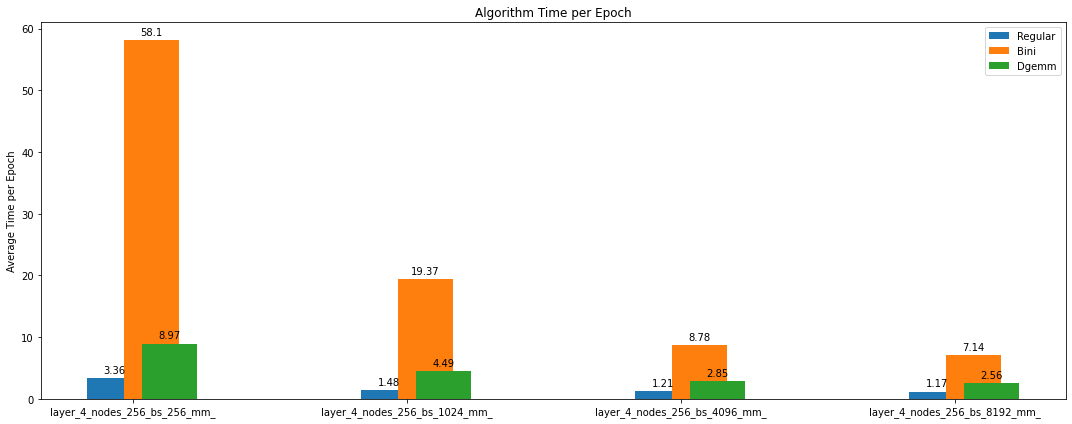

In [59]:
types = ['layer_4_nodes_256_bs_256_mm_','layer_4_nodes_256_bs_1024_mm_','layer_4_nodes_256_bs_4096_mm_','layer_4_nodes_256_bs_8192_mm_',]
epoch_time_plotter(types=types)

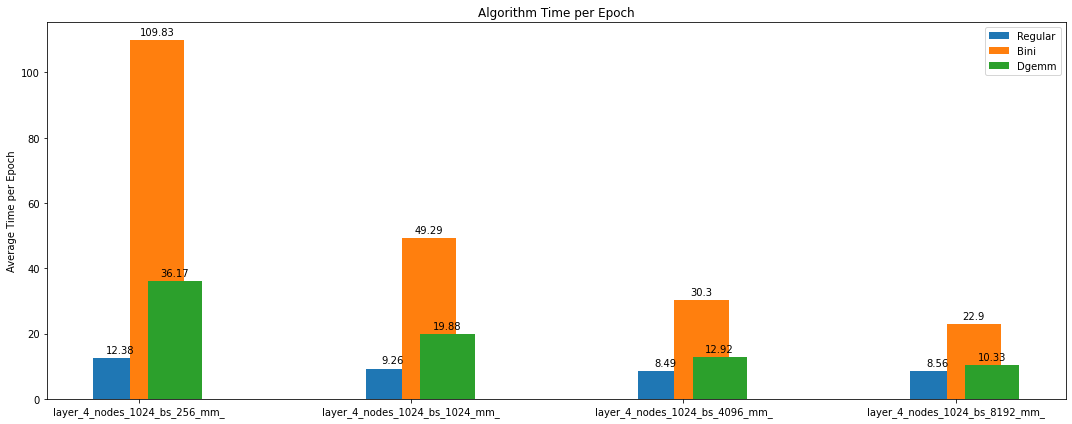

In [61]:
types = ['layer_4_nodes_1024_bs_256_mm_','layer_4_nodes_1024_bs_1024_mm_','layer_4_nodes_1024_bs_4096_mm_','layer_4_nodes_1024_bs_8192_mm_']
epoch_time_plotter(types=types)

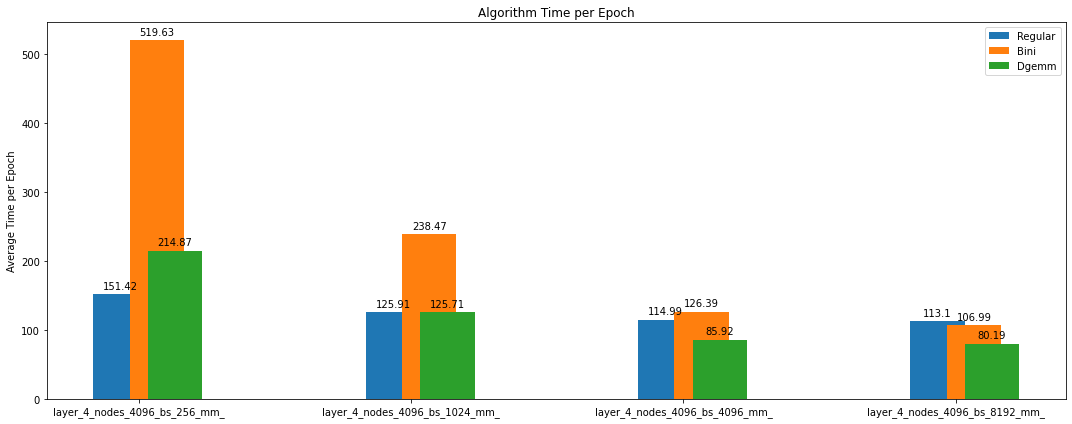

In [63]:
types = ['layer_4_nodes_4096_bs_256_mm_','layer_4_nodes_4096_bs_1024_mm_',
 'layer_4_nodes_4096_bs_4096_mm_',
 'layer_4_nodes_4096_bs_8192_mm_',]
epoch_time_plotter(types=types)

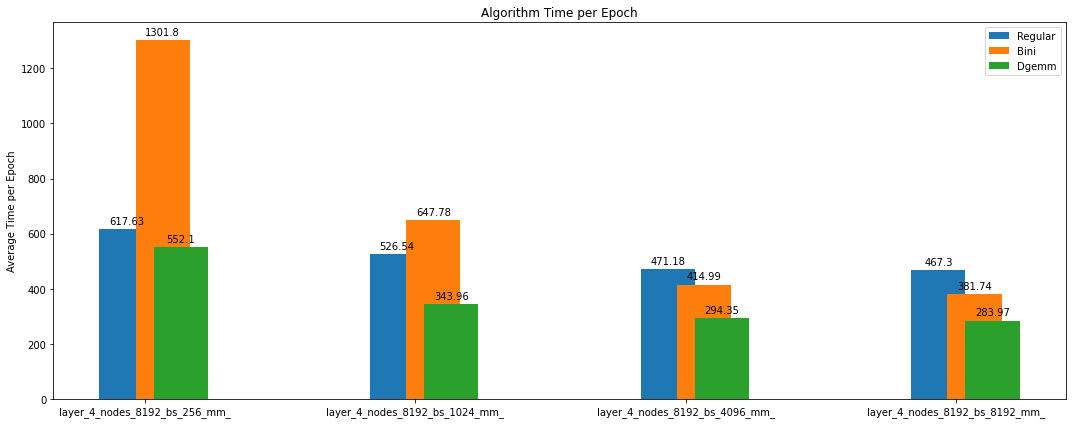

In [64]:
types = ['layer_4_nodes_8192_bs_256_mm_','layer_4_nodes_8192_bs_1024_mm_', 'layer_4_nodes_8192_bs_4096_mm_', 'layer_4_nodes_8192_bs_8192_mm_',]
epoch_time_plotter(types=types)